
---


<div>
<img src="images/HW1_problem_1.png" width="1500"/>
</div>

(a) $What\ is\ the\ joint\ likelihood\ of\ the\ data\  
(x1, ... ,xN)$  ?

<div>
<img src="images/HW1_solution_1a.png" width="600"/>
</div>

(b) $ Derive\ the\ maximum\ likelihood\ estimate\  \hat{\pi}_{ML}$ for ${\pi}$

$\text{To help learn } {\pi},\text{ you use a prior distribution. You select the  distribution  p(} {\pi}) = \beta(a ,b).$

<div>
<img src="images/HW1_solution_1b1.png" width="600"/>
</div>

<div>
<img src="images/HW1_solution_1b2.png" width="600"/>
</div>

(c) $\text{Derive the maximum  a posteriori  (MAP) estimate } \hat{\pi}_{MAP}\ for\  {\pi}$ ?

<div>
<img src="images/HW1_solution_1c1.png" width="600"/>
</div>

<div>
<img src="images/HW1_solution_1c2.png" width="600"/>
</div>


(d) $\text{Use Bayes rule to derive the posterior distribution of }  {\pi} \text{ and  identify the name of this      distribution.}$

<div>
<img src="images/HW1_solution_1d.png" width="600"/>
</div>

(e) $\text{What is the mean and variance of } {\pi} \text{  under this posterior?   Discuss how it relates to } \hat{\pi}_{ML}\ and\ \hat{\pi}_{MAP}$

<div>
<img src="images/HW1_solution_1e.png" width="600"/>
</div>


___

<div>
<img src="images/HW1_problem_2_1.png" width="1500"/>
</div>

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import genfromtxt

In [4]:
df_X_train = genfromtxt('X_train.csv', delimiter=',')
df_Y_train = genfromtxt('Y_train.csv', delimiter=',')
df_X_test = genfromtxt('X_test.csv', delimiter=',')
df_Y_test = genfromtxt('Y_test.csv', delimiter=',')

<div>
<img src="WRR-formula.png" width="300"/>
</div>


In [5]:
#############################################################################
def WRR(X_train , Y_train , Lam_range, feature_count):
    
    I = np.identity(feature_count)
    
    WRR= [0 for row in range(Lam_range)]
    dof = []
    X_train_trans = X_train.transpose()
    
    for  Lam in range(0, Lam_range):
      
      Lam_Identity = np.dot(Lam , I)
      
      Inverse =   inv( Lam_Identity + np.dot(X_train_trans ,X_train))
      part1 = np.dot(Inverse ,X_train_trans)
      part2 = np.dot(part1 , X_train)

      WRR[Lam] = np.dot(part1 , df_Y_train)
      
      dof.append ( np.trace( part2))

    return np.asarray(WRR) , np.asarray(dof)
    


#### ADD LEGEND 
#############################################################################
def predict( WRR , X_test , Lam_range):
    
    Y_predict= [0 for row in range(Lam_range)]

    for  i in range(0, Lam_range):
        Y_predict[i] = np.dot(WRR[i], X_test.transpose())

    return Y_predict

#############################################################################

## Root Mean  Square Error
def RMSE (Y_predict ,Y_test ,Lam_range, test_rec_count ):
 
 RMSE= [0 for row in range(Lam_range)] 
 

 for  i in range(0, Lam_range):
     square_error  =  np.square(Y_predict[i] - Y_test)

     RMSE[i] =  np.sqrt((np.sum(square_error)/test_rec_count))
 
 return RMSE


$\text{ (a) For } \lambda \text{ =  0 ,  1 ,  2 ,  3 ,  . . .  , 5000, solve for }  w_{RR}\text{  .(Notice that when }  \lambda \text{ = 0,}   w_{RR} = w_{LS} \text{.) In  one  figure , plot  the  7  values  in }  w_{RR} \text{ as a function of } df(\lambda). \text{ You will  need to call  a  built  in  SVD  function  to  do  this.  Be sure to label your 7 curves by their dimension in  x.}$

$\text{ (b) The 4th dimension (car weight) and 6th dimension (car year) clearly stand out over the other
dimensions. What information can we get from this?}$

$\text{ The 4th Dimension and the 6th Dimension stand out that means that per unit change in
Weight and per unit change in car year have the most }$
$\text{impact on the output value of y .
Also these two elements have the largest contribution in the variance of the regression.}$

[-0.44572373  0.57776701 -0.34449687 -5.40968597  0.25110636  2.76333513
  0.00812705] 6.8504825130584255


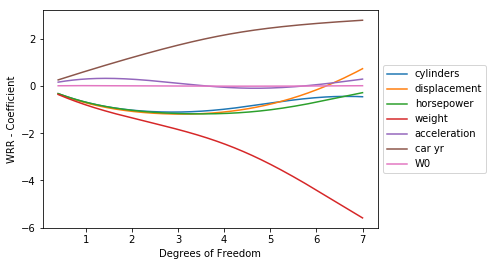

In [6]:
#############################################################################
W_RR , DOF= WRR (df_X_train ,df_Y_train ,5000, 7)
print (W_RR[1], DOF[1])

plt.figure(1)
label = [ 'cylinders' , 'displacement' ,
        'horsepower'  ,'weight' , 'acceleration' ,'car yr' ,'W0']
for  i in range(0,7 ):
    plt.plot(DOF ,W_RR[:,i],label = label[i]) 


plt.xlabel("Degrees of Freedom")
plt.ylabel("WRR - Coefficient")
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


$(c)\  \text{For}$ $ \lambda$ $\text{= 0, ... , 50, predict all 42 test cases. Plot the root mean squared error}$ $(RMSE)^2$ $\text{on the test
set as a function of}$ $\lambda$ $\text{—not as a function of}$ $ df(\lambda).$$\text{ What does this figure tell you when choosing }$ $\lambda$ $\text{
for this problem (and when choosing between ridge regression and least squares)?}$

When choosing λ , the Lower λ seems to give a better performance in terms of the
RMSE.

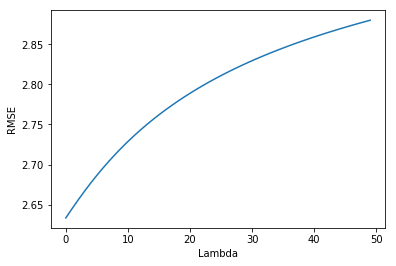

In [7]:
Y_predict = predict (W_RR ,df_X_test , 50 )

RMSE_X1 =  RMSE(Y_predict , df_Y_test ,50, 42)
plt.figure(2)


plt.plot(range(50), np.asarray(RMSE_X1)) 

plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.show()

$\text{(d) In one figure, plot the test RMSE as a function of} \lambda \text{= 0, ..., 500}$
$\text{for p = 1, 2, 3. Based on this plot, which value of p should you choose and why? How does your assessment of the ideal value of } \lambda $
$\text{change for this problem?}$

In [8]:
#############################################################################
# add 2 and 3 order terms in the input matrix 
def get_pth_order ( X  ):

    X_1 = X
    X_2 = []
    X_3 = []
    
    for i in range (len(X_1)):
        X_2.append([])
        X_3.append([])
        for j in range(len(X_1[0])):
            X_2[i].append((X_1[i][j]))
            X_3[i].append((X_1[i][j]))
            
        for j in range(len(X_1[0])-1):
            X_2[i].append((X_1[i][j])**2)
            X_3[i].append((X_1[i][j])**2)

        for j in range(len(X_1[0])-1):
            X_3[i].append((X_1[i][j])**3)


    return X_1 , np.asarray(X_2) , np.asarray(X_3)



In [9]:
X1_train , X2_train , X3_train = get_pth_order (df_X_train )
X1_test , X2_test , X3_test = get_pth_order (df_X_test )

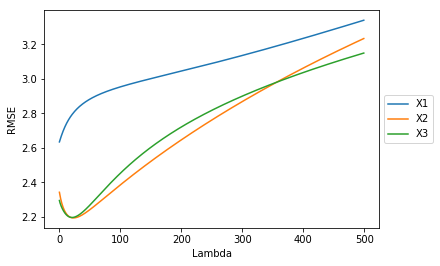

In [10]:
W_RR_X_1 , DOF= WRR (X1_train ,df_Y_train ,500, 7)
Y_predict_X_1 = predict (W_RR_X_1 ,X1_test , 500 )
RMSE_X1 =  RMSE(Y_predict_X_1 , df_Y_test ,500, 42)

W_RR_X_2 , DOF= WRR (X2_train ,df_Y_train ,500, 13)
Y_predict_X_2 = predict (W_RR_X_2 ,X2_test , 500 )
RMSE_X2 =  RMSE(Y_predict_X_2 , df_Y_test ,500, 42)


W_RR_X_3 , DOF= WRR (X3_train ,df_Y_train ,500, 19)
Y_predict_X_3 = predict (W_RR_X_3 ,X3_test , 500 )
RMSE_X3 =  RMSE(Y_predict_X_3 , df_Y_test ,500, 42)

plt.figure(3)

plt.plot(range(500), np.asarray(RMSE_X1) ,label = "X1") 
plt.plot(range(500), np.asarray(RMSE_X2), label = "X2")  
plt.plot(range(500), np.asarray(RMSE_X3), label = "X3") 

plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
           
plt.show() 

d) Based on the plot above , P2 seem to have the best performance when λ = 23. The ideal
value of λ has increased compared to what we observed part-c with Order -1 regression.